# Hospitality Domain Data Analysis


In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_date=pd.read_csv(r"C:\Users\RaJat sharma\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
d_hotel=pd.read_csv(r"C:\Users\RaJat sharma\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
d_room=pd.read_csv(r"C:\Users\RaJat sharma\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
fact_aggregate_booking=pd.read_csv(r"C:\Users\RaJat sharma\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")
fact_booking=pd.read_csv(r"C:\Users\RaJat sharma\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")



Data Exploration

In [3]:
fact_booking.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [4]:
fact_aggregate_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [5]:
d_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [6]:
d_hotel.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [7]:
d_room.head(3)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium


Data Cleaning

In [8]:
fact_booking.describe(),fact_aggregate_booking.describe()

(         property_id      no_guests  ratings_given  revenue_generated  \
 count  134590.000000  134587.000000   56683.000000       1.345900e+05   
 mean    18061.113493       2.036170       3.619004       1.537805e+04   
 std      1093.055847       1.034885       1.235009       9.303604e+04   
 min     16558.000000     -17.000000       1.000000       6.500000e+03   
 25%     17558.000000       1.000000       3.000000       9.900000e+03   
 50%     17564.000000       2.000000       4.000000       1.350000e+04   
 75%     18563.000000       2.000000       5.000000       1.800000e+04   
 max     19563.000000       6.000000       5.000000       2.856000e+07   
 
        revenue_realized  
 count     134590.000000  
 mean       12696.123256  
 std         6928.108124  
 min         2600.000000  
 25%         7600.000000  
 50%        11700.000000  
 75%        15300.000000  
 max        45220.000000  ,
         property_id  successful_bookings     capacity
 count   9200.000000          920

In [9]:
#removing negative number of Guest(data cleaning)

In [10]:
fact_booking=fact_booking[fact_booking.no_guests>0]

In [11]:
#removing outlier from revenue generated

In [12]:
avg=fact_booking.revenue_generated.mean()
std=fact_booking.revenue_generated.std()

In [13]:
fact_booking[fact_booking.revenue_generated>avg+3*std]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [14]:
fact_booking=fact_booking[fact_booking.revenue_generated<avg+3*std]


In [15]:
fact_booking.isna().sum(),fact_aggregate_booking.isna().sum(),d_hotel.isna().sum(),d_room.isna().sum()

(booking_id               0
 property_id              0
 booking_date             0
 check_in_date            0
 checkout_date            0
 no_guests                0
 room_category            0
 booking_platform         0
 ratings_given        77897
 booking_status           0
 revenue_generated        0
 revenue_realized         0
 dtype: int64,
 property_id            0
 check_in_date          0
 room_category          0
 successful_bookings    0
 capacity               2
 dtype: int64,
 property_id      0
 property_name    0
 category         0
 city             0
 dtype: int64,
 room_id       0
 room_class    0
 dtype: int64)

In [16]:
# replacing na in capacity with mean

In [17]:
fact_aggregate_booking.capacity.fillna(fact_aggregate_booking.capacity.mean(), inplace=True)

In [18]:
#changing date to datetime type

In [19]:
fact_booking['check_in_date'] = pd.to_datetime(fact_booking['check_in_date'],format='mixed')
d_date['date']=pd.to_datetime(d_date['date'],format='mixed')
fact_aggregate_booking['check_in_date'] = pd.to_datetime(fact_aggregate_booking['check_in_date'],format='mixed')


In [20]:
# merging table

In [21]:
df=pd.merge(fact_booking,fact_aggregate_booking,on=['check_in_date','property_id','room_category'])
df=pd.merge(df,d_date,left_on='check_in_date',right_on='date')
df.drop(['date'], axis=1,inplace=True)# drop date col
df.drop(['day_type'], axis=1,inplace=True)# drop old date type
def f(x):
    if x.weekday()==4 or x.weekday()==5:
        val = "weekend"
    else:
        val="weekday"
    return val

df['day_type']=df['check_in_date'].apply(f)

In [22]:

def g(x):
    list=x.split()
    return list[1]
    
df['n_week_no']=df['week no'].apply(g)



In [23]:

df=pd.merge(df,d_hotel,on='property_id')
df=pd.merge(df,d_room,left_on='room_category',right_on='room_id')
df.drop(['room_id'], axis=1,inplace=True)
df['c_capacity']=df.groupby(['property_id','check_in_date','room_category'])['capacity'].transform('count')
df['c_suc_book']=df.groupby(['property_id','check_in_date','room_category'])['successful_bookings'].transform('count')

In [24]:
def ADR(df):
    r=df.revenue_realized.sum()
    c=df.booking_id.count()
    return round(r/c,1)

def Realisation_PER(df):
    s=df[df.booking_status=='Checked Out'].booking_id.count()
    c=df.booking_id.count()
    return round((s/c)*100,1)
def AVG_rating(df):
     return round(df.ratings_given.mean(),1)

def can_PER(df):
    s=df[df.booking_status=='Cancelled'].booking_id.count()
    c=df.booking_id.count()
    return round((s/c)*100,1)
        
def REVPAR(df):
    r=df.revenue_realized.sum()
    cap=(df.capacity/df.c_capacity).sum()
    return round(r/cap,1)

def Revenue(df):
    return df.revenue_realized.sum()

def OOC_PER(df):
    r=(df.successful_bookings/df.capacity).mean()
    return round(r*100,1)

def DBRN(df):
    c_suc_book=(df.successful_bookings/df.c_suc_book).sum()
    d=len(df['check_in_date'].unique())
    return round(c_suc_book/d,1)

def DSRN(df):
    cap=(df.capacity/df.c_capacity).sum()
    d=len(df['check_in_date'].unique())
    return round(cap/d,1)

def DURN(df):
    s=df[df.booking_status=='Checked Out'].booking_id.count()
    d=len(df['check_in_date'].unique())
    return round(s/d,1)

In [25]:
Revenue(df),ADR(df),REVPAR(df),Realisation_PER(df)

(1175507782, 12697.5, 7153.8, 70.1)

In [26]:
AVG_rating(df)

3.6

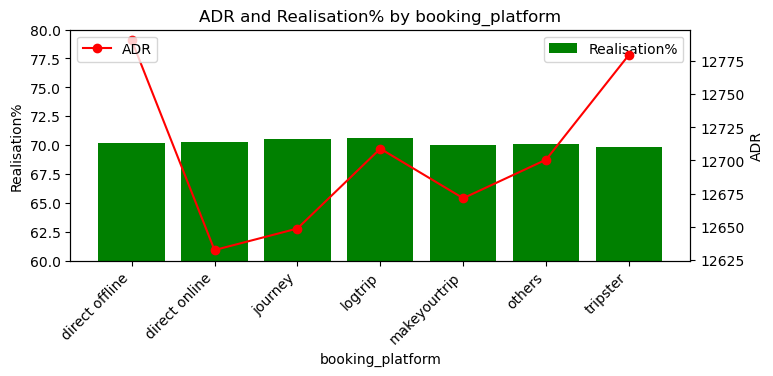

In [27]:
grp_platform=fact_booking.groupby('booking_platform')
booking_platform=grp_platform.apply(ADR).reset_index()
booking_platform.rename(columns={0:"ADR"},inplace=True)
booking_platform_r=grp_platform.apply(Realisation_PER).reset_index()
booking_platform_r.rename(columns={0:"Realisation%"},inplace=True)
booking_platform=pd.merge(booking_platform,booking_platform_r)
plt.figure(figsize=(8,3)) 
plt.xlabel('booking_platform')
plt.xticks(rotation=45, ha='right')
plt.bar(booking_platform['booking_platform'], booking_platform["Realisation%"], color='green', label='Realisation%')
plt.ylabel('Realisation%')
plt.ylim(60, 80)
plt.title('ADR and Realisation% by booking_platform')
plt.legend(loc='upper right')
ax2 = plt.twinx()
ax2.plot(booking_platform['booking_platform'], booking_platform["ADR"], color='red', marker='o', label='ADR')
ax2.set_ylabel('ADR')
ax2.legend(loc='upper left')
plt.show()

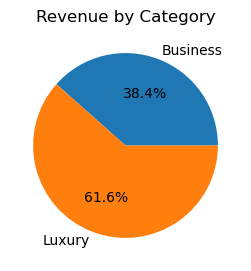

In [28]:
revenue_by_cat=df.groupby('category')
a=revenue_by_cat.apply(Revenue).reset_index()
plt.figure(figsize=(8,3))
plt.title('Revenue by Category')
plt.pie(a[0],labels=a['category'],autopct='%1.1f%%')
plt.show()

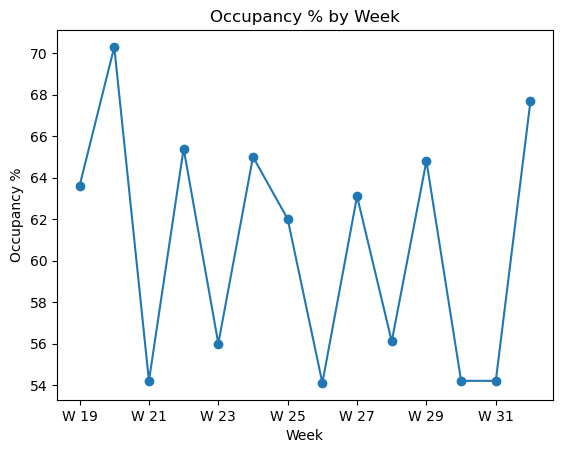

In [29]:
g_week=df.groupby('week no')

g_week.apply(OOC_PER).plot(marker='o')
plt.xlabel('Week')
plt.ylabel('Occupancy %')
plt.title('Occupancy % by Week')
plt.show()

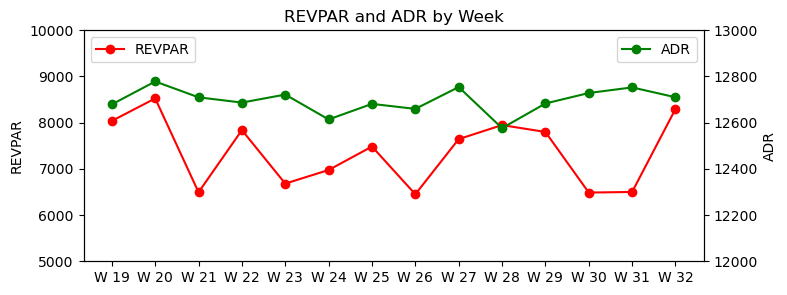

In [30]:
g=g_week.apply(REVPAR).reset_index()
g1=g_week.apply(ADR).reset_index()
gf=pd.merge(g,g1,on='week no')
plt.figure(figsize=(8,3))
plt.plot(gf['week no'],gf["0_x"], color='red',marker='o', label='REVPAR')
plt.ylabel('REVPAR')
plt.ylim(5000,10000)
plt.legend(loc='upper left')
ax2 = plt.twinx()
ax2.plot(gf['week no'],gf["0_y"], color='green',marker='o', label='ADR')
ax2.set_ylabel('ADR')
ax2.set_ylim(12000,13000)
plt.title('REVPAR and ADR by Week')
ax2.legend(loc='upper right')
plt.show()

In [31]:
grp_day_type=df.groupby('day_type')
a=grp_day_type.apply(ADR).reset_index()
a.rename(columns={0:"ADR"},inplace=True)
a1=grp_day_type.apply(REVPAR).reset_index()
a1.rename(columns={0:"REVPAR"},inplace=True)
a2=grp_day_type.apply(Realisation_PER).reset_index()
a2.rename(columns={0:"Realisation%"},inplace=True)
a3=grp_day_type.apply(OOC_PER).reset_index()
a3.rename(columns={0:"OOC_PER"},inplace=True)
a=pd.merge(a,a1,on='day_type')
a=pd.merge(a,a2,on='day_type')
a=pd.merge(a,a3,on='day_type')
a

,day_type,ADR,REVPAR,Realisation%,OOC_PER
0,weekday,12687.6,6876.1,70.0,57.1
1,weekend,12720.2,7878.8,70.5,65.6


In [32]:
grp_property=df.groupby(['property_id','property_name'])
a=grp_property.apply(Revenue).reset_index()
a.rename(columns={0:"Revenue"},inplace=True)
a1=grp_property.apply(ADR).reset_index()
a1.rename(columns={0:"ADR"},inplace=True)
a2=grp_property.apply(REVPAR).reset_index()
a2.rename(columns={0:"REVPAR"},inplace=True)
a3=grp_property.apply(DBRN).reset_index()
a3.rename(columns={0:"DBRN"},inplace=True)
a4=grp_property.apply(DSRN).reset_index()
a4.rename(columns={0:"DSRN"},inplace=True)
a5=grp_property.apply(DURN).reset_index()
a5.rename(columns={0:"DURN"},inplace=True)
a6=grp_property.apply(AVG_rating).reset_index()
a6.rename(columns={0:"AVG_rating"},inplace=True)
a7=grp_property.apply(Realisation_PER).reset_index()
a7.rename(columns={0:"Realisation%"},inplace=True)
a8=grp_property.apply(can_PER).reset_index()
a8.rename(columns={0:"Cancellation%"},inplace=True)
a=pd.merge(a,a1,on=['property_id','property_name'])
a=pd.merge(a,a2,on=['property_id','property_name'])
a=pd.merge(a,a3,on=['property_id','property_name'])
a=pd.merge(a,a4,on=['property_id','property_name'])
a=pd.merge(a,a5,on=['property_id','property_name'])
a=pd.merge(a,a6,on=['property_id','property_name'])
a=pd.merge(a,a7,on=['property_id','property_name'])
a=pd.merge(a,a8,on=['property_id','property_name'])
a

,property_id,property_name,Revenue,ADR,REVPAR,DBRN,DSRN,DURN,AVG_rating,Realisation%,Cancellation%
0,16558,Atliq Grands,24915240,11497.6,7371.4,33.3,52.0,23.4,4.2,70.2,24.6
1,16559,Atliq Exotica,80538690,16050.0,10240.1,77.2,121.0,53.9,4.3,69.8,25.2
2,16560,Atliq City,37941918,11728.6,6144.4,49.8,95.0,35.4,3.0,71.0,24.1
3,16561,Atliq Blu,39861444,13125.3,8400.7,46.7,73.0,32.8,4.3,70.2,25.2
4,16562,Atliq Bay,38969980,11748.6,6117.7,51.0,98.0,35.7,3.1,70.0,24.6
5,16563,Atliq Palace,61579406,12500.9,8097.2,75.8,117.0,53.0,4.3,70.0,25.3
6,17558,Atliq Grands,51375496,14818.4,7748.9,53.3,102.0,37.4,3.0,70.2,25.9
7,17559,Atliq Exotica,64235486,15297.8,9784.5,64.6,101.0,45.6,4.3,70.6,24.5
8,17560,Atliq City,60536405,14590.6,7571.8,63.8,123.0,44.2,3.1,69.2,25.4
9,17561,Atliq Blu,50831105,14238.4,9200.2,54.9,85.0,38.1,4.3,69.4,24.6


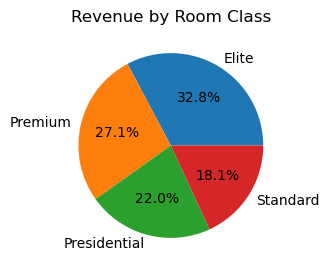

In [33]:
revenue_by_cat=df.groupby('room_class')
a=revenue_by_cat.apply(Revenue).reset_index()
plt.figure(figsize=(8,3))
plt.title('Revenue by Room Class')
plt.pie(a[0],labels=a['room_class'],autopct='%1.1f%%')
plt.show()

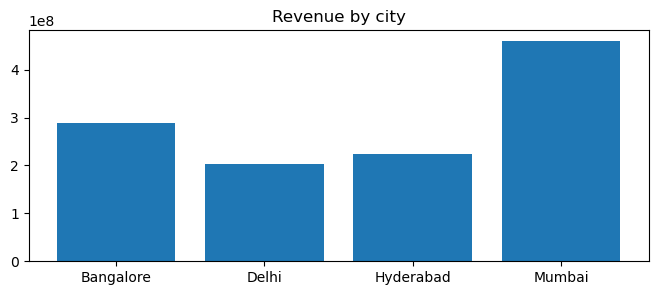

In [34]:
revenue_by_city=df.groupby('city')
a=revenue_by_city.apply(Revenue).reset_index()
plt.figure(figsize=(8,3))
plt.title('Revenue by city')
plt.bar(a['city'],a[0])
plt.show()